In [10]:
import pandas as pd
df = pd.read_csv('data/medicare-hospital-cost-report-puf-2014-1.csv')
df.head()

,Provider CCN,Hospital Name,Street Address,City,State Code,Zip Code,County,Medicare CBSA Number,Rural Versus Urban,CCN Facility Type,...,Net Income from Service to Patients,Total Other Income,Total Income,Total Other Expenses,Net Income,Cost To Charge Ratio,Net Revenue from Medicaid,Medicaid Charges,Net Revenue from Stand-Alone SCHIP,Stand-Alone SCHIP Charges
0,364007,TWIN VALLEY BHO - COLUMBUS CAMPUS,2200 WEST BROAD STREET,COLUMBUS,OH,43223,FRANKLIN,18140.0,U,PH,...,-49244162.0,NaN,-49244162.0,NaN,-49244162.0,NaN,NaN,NaN,NaN,NaN
1,264010,ST. LOUIS PSYCHIATRIC REHAB CTR.,500 ARSENAL STREET,ST.LOUIS,MO,63119,ST.LOUIS CITY,41180.0,U,PH,...,-2506210.0,16678.0,-2489532.0,NaN,-2489532.0,0.84,NaN,NaN,NaN,NaN
2,334015,ROCKLAND P.C.,140 OLD ORANGEBURG ROAD,ORANGEBURG,NY,10962-1196,ROCKLAND,35004.0,U,PH,...,-113549859.0,NaN,-113549859.0,NaN,-113549859.0,7.49,NaN,NaN,NaN,NaN
3,364011,NORTHCOAST BHO,1756 SAGAMORE ROAD,NORTHFIELD,OH,44109-1911,SUMMIT,10420.0,U,PH,...,-50727002.0,NaN,-50727002.0,NaN,-50727002.0,NaN,NaN,NaN,NaN,NaN
4,334020,ROCHESTER P.C.,1111 ELMWOOD AVE.,ROCHESTER,NY,14620-3965,MONROE,40380.0,U,PH,...,-40454985.0,NaN,-40454985.0,NaN,-40454985.0,31.21,NaN,NaN,NaN,NaN


In [11]:
df.columns.values

array(['Provider CCN', 'Hospital Name', 'Street Address', 'City',
       'State Code', 'Zip Code', 'County', 'Medicare CBSA Number',
       'Rural Versus Urban', 'CCN Facility Type', 'Provider Type',
       'Type of Control', 'Fiscal Year Begin Date',
       'Fiscal Year End Date', 'FTE - Employees on Payroll',
       'Number of Interns and Residents (FTE)', 'Total Days Title V',
       'Total Days Title XVIII', 'Total Days Title XIX',
       'Total Days (V + XVIII + XIX + Unknown)', 'Number of Beds',
       'Total Bed Days Available', 'Total Discharges Title V',
       'Total Discharges Title XVIII', 'Total Discharges Title XIX',
       'Total Discharges (V + XVIII + XIX + Unknown)',
       'Total Days Title V + Total for all Subproviders',
       'Total Days Title XVIII + Total for all Subproviders',
       'Total Days Title XIX + Total for all Subproviders',
       'Total Days (V + XVIII + XIX + Unknown) + Total for all Subprovid',
       'Number of Beds + Total for all Subproviders

In [12]:
#Drop name and address
to_drop = ['Hospital Name', 'Street Address']
df = df.drop(to_drop, axis=1)

In [ ]:
def column_to_numeric(x):
    for index, r in enumerate(ratings):
        if x==r:
            return index
    return -1

In [17]:
from pandas.api.types import is_string_dtype
new_df = df
for column in df:
    if is_string_dtype(df[column]):
        new_df[column] = df[column].astype('category').cat.codes

new_df.head()


,Provider CCN,City,State Code,Zip Code,County,Medicare CBSA Number,Rural Versus Urban,CCN Facility Type,Provider Type,Type of Control,...,Net Income from Service to Patients,Total Other Income,Total Income,Total Other Expenses,Net Income,Cost To Charge Ratio,Net Revenue from Medicaid,Medicaid Charges,Net Revenue from Stand-Alone SCHIP,Stand-Alone SCHIP Charges
0,364007,572,37,1983,543,18140.0,1,4,2,10,...,-49244162.0,NaN,-49244162.0,NaN,-49244162.0,NaN,NaN,NaN,NaN,NaN
1,264010,2670,25,3183,1458,41180.0,1,4,2,10,...,-2506210.0,16678.0,-2489532.0,NaN,-2489532.0,0.84,NaN,NaN,NaN,NaN
2,334015,2062,36,405,1292,35004.0,1,4,2,10,...,-113549859.0,NaN,-113549859.0,NaN,-113549859.0,7.49,NaN,NaN,NaN,NaN
3,364011,1994,37,2033,1486,10420.0,1,4,2,10,...,-50727002.0,NaN,-50727002.0,NaN,-50727002.0,NaN,NaN,NaN,NaN,NaN
4,334020,2379,36,532,1005,40380.0,1,4,2,10,...,-40454985.0,NaN,-40454985.0,NaN,-40454985.0,31.21,NaN,NaN,NaN,NaN


In [24]:
#View percentage of missing values in each column
percent_missing = new_df.isnull().sum() * 100 / len(new_df)
missing_value_df = pd.DataFrame({'column_name': new_df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)


In [26]:
#Drop columns with over 50% missing values
missing_value_df = missing_value_df[percent_missing>=50]
missing_value_df.head()

c:\python34\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,column_name,percent_missing
Notes and Loans Payable (Short Term),Notes and Loans Payable (Short Term),51.872599
Other Current Assets,Other Current Assets,53.072983
Allowable DSH Percentage,Allowable DSH Percentage,54.097311
Disproporationate Share Adjustment,Disproporationate Share Adjustment,54.113316
"DRG amounts before October 1, 2013","DRG amounts before October 1, 2013",56.402049


In [29]:
to_drop = missing_value_df['column_name'].ravel() 
new_df = new_df.drop(to_drop, axis=1)
new_df.head()

,Provider CCN,City,State Code,Zip Code,County,Medicare CBSA Number,Rural Versus Urban,CCN Facility Type,Provider Type,Type of Control,...,Less Contractual Allowance and discounts on patients' accounts,Net Patient Revenue,Less Total Operating Expense,Net Income from Service to Patients,Total Other Income,Total Income,Net Income,Cost To Charge Ratio,Net Revenue from Medicaid,Medicaid Charges
0,364007,572,37,1983,543,18140.0,1,4,2,10,...,NaN,NaN,49244162.0,-49244162.0,NaN,-49244162.0,-49244162.0,NaN,NaN,NaN
1,264010,2670,25,3183,1458,41180.0,1,4,2,10,...,4790132.0,33822631.0,36328841.0,-2506210.0,16678.0,-2489532.0,-2489532.0,0.84,NaN,NaN
2,334015,2062,36,405,1292,35004.0,1,4,2,10,...,NaN,NaN,113549859.0,-113549859.0,NaN,-113549859.0,-113549859.0,7.49,NaN,NaN
3,364011,1994,37,2033,1486,10420.0,1,4,2,10,...,NaN,NaN,50727002.0,-50727002.0,NaN,-50727002.0,-50727002.0,NaN,NaN,NaN
4,334020,2379,36,532,1005,40380.0,1,4,2,10,...,NaN,NaN,40454985.0,-40454985.0,NaN,-40454985.0,-40454985.0,31.21,NaN,NaN


In [30]:
new_df.columns.values

array(['Provider CCN', 'City', 'State Code', 'Zip Code', 'County',
       'Medicare CBSA Number', 'Rural Versus Urban', 'CCN Facility Type',
       'Provider Type', 'Type of Control', 'Fiscal Year Begin Date',
       'Fiscal Year End Date', 'FTE - Employees on Payroll',
       'Total Days Title XVIII', 'Total Days Title XIX',
       'Total Days (V + XVIII + XIX + Unknown)', 'Number of Beds',
       'Total Bed Days Available', 'Total Discharges Title XVIII',
       'Total Discharges Title XIX',
       'Total Discharges (V + XVIII + XIX + Unknown)',
       'Total Days Title XVIII + Total for all Subproviders',
       'Total Days Title XIX + Total for all Subproviders',
       'Total Days (V + XVIII + XIX + Unknown) + Total for all Subprovid',
       'Number of Beds + Total for all Subproviders',
       'Total Bed Days Available + Total for all Subproviders',
       'Total Discharges Title XVIII + Total for all Subproviders',
       'Total Discharges Title XIX + Total for all Subproviders

In [31]:
#Replace nan with -1
new_df = new_df.fillna(value=-1) 

In [32]:
new_df.head()

,Provider CCN,City,State Code,Zip Code,County,Medicare CBSA Number,Rural Versus Urban,CCN Facility Type,Provider Type,Type of Control,...,Less Contractual Allowance and discounts on patients' accounts,Net Patient Revenue,Less Total Operating Expense,Net Income from Service to Patients,Total Other Income,Total Income,Net Income,Cost To Charge Ratio,Net Revenue from Medicaid,Medicaid Charges
0,364007,572,37,1983,543,18140.0,1,4,2,10,...,-1.0,-1.0,49244162.0,-49244162.0,-1.0,-49244162.0,-49244162.0,-1.00,-1.0,-1.0
1,264010,2670,25,3183,1458,41180.0,1,4,2,10,...,4790132.0,33822631.0,36328841.0,-2506210.0,16678.0,-2489532.0,-2489532.0,0.84,-1.0,-1.0
2,334015,2062,36,405,1292,35004.0,1,4,2,10,...,-1.0,-1.0,113549859.0,-113549859.0,-1.0,-113549859.0,-113549859.0,7.49,-1.0,-1.0
3,364011,1994,37,2033,1486,10420.0,1,4,2,10,...,-1.0,-1.0,50727002.0,-50727002.0,-1.0,-50727002.0,-50727002.0,-1.00,-1.0,-1.0
4,334020,2379,36,532,1005,40380.0,1,4,2,10,...,-1.0,-1.0,40454985.0,-40454985.0,-1.0,-40454985.0,-40454985.0,31.21,-1.0,-1.0


In [33]:
#Drop name and address
to_drop = ['Fiscal Year Begin Date',
       'Fiscal Year End Date']
new_df = new_df.drop(to_drop, axis=1)

In [35]:
#Calculate mutual information, showing which features influence the rating most
from sklearn.feature_selection import mutual_info_classif

feature_scores = mutual_info_classif(new_df, new_df["Net Income"].astype(int))

In [36]:
import numpy as np
norm_feature_scores = feature_scores/np.max(feature_scores)
features = []
fscores = []
for score, fname in sorted(zip(norm_feature_scores, new_df.columns.values), reverse=True)[:30]:
    print(fname, score)
    features.append(fname)
    fscores.append(score)

Net Income 1.0
Total Current Assets 0.925048167973331
Land 0.8774091236710131
Total Liabilities 0.8759716602914789
Buildings 0.8717582610234611
Total Assets 0.8704099395111142
Total Current Liabilities 0.8577824224508765
Accounts Receivable 0.837602533745571
Total Other Assets 0.8287032640417457
DRG Amounts Other Than Outlier Payments 0.82159879700713
Total Income 0.8214516650708553
Accounts Payable 0.8187942479408489
Total fixed Assets 0.8007140352240549
Total Long Term Liabilities 0.786614516673859
Cash on Hand and in Banks 0.7802607000685764
Salaries, Wages, and Fees Payable 0.7618455238195949
Total Liabilities and Fund Balances 0.7461392458820919
Prepaid Expenses 0.7286333740466401
Net Income from Service to Patients 0.710952664452443
Other Assets 0.7069867844982949
Major Movable Equipment 0.7024145802195335
Total Fund Balances 0.6876283960018162
Less Total Operating Expense 0.6764631841193699
Gross Revenue 0.6729788432113715
Net Patient Revenue 0.6691119091110087
Inventory 0.66414

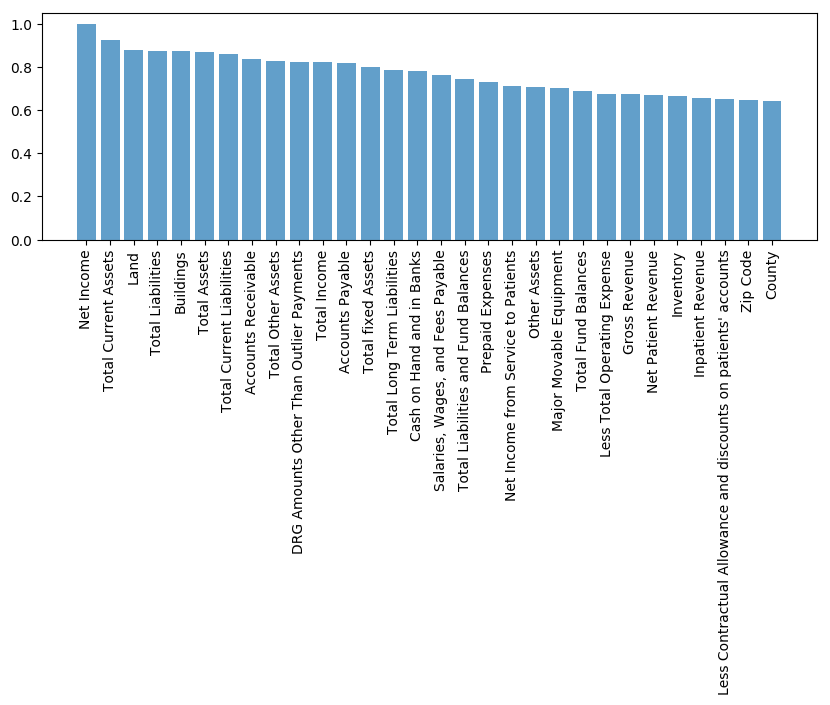

In [38]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = (10, 3)
rcParams['figure.dpi'] = 100
x = range(len(features))
plt.xticks(x, features, rotation=90)

plt.bar(x,fscores, align='center', alpha=0.7)
plt.show()